# Accessibility Score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Entrance Accessibilty Score

In [124]:
#loading dataframes
entrance_sozio = pd.read_json('../get_isodistances/final_entrance.json', orient='index')
entrance_size = pd.read_json('../get_park_data/park_size_data.json', orient='index')
entrance_size

,name,size,walk_dist
0,Alsenpark,1.6005,500
1,Alsterpark Klein Borstel,27.2419,1000
2,Alstervorland,13.7983,1000
3,Alter Botanischer Garten,7.9442,500
4,Alter Elbpark,5.0377,500
...,...,...,...
117,Wehbers Park,3.1201,500
118,Wesselhoeftpark,4.6759,500
119,Westerpark,15.5176,1000
120,Wilhelmsburger Inselpark,45.3670,1000


In [125]:
# merging and transforming relevant columns
entrance_df = pd.merge(entrance_sozio, entrance_size, on="name")
entrance_df = entrance_df.rename(columns = {"size": "size_ha"})
entrance_df["size_m2"] = entrance_df["size_ha"]*10000
entrance_df

,name,Einwohner,Alter_D,unter18_A,ab65_A,Auslaender_A,HHGroesse_D,Leerstandsquote,Wohnfl_Bew_D,Wohnfl_Whg_D,census_blocks,size_ha,walk_dist,size_m2
0,Alsenpark,9072.626025,38.776610,14.490263,12.280133,18.304357,1.845922,0.987105,34.301941,61.099637,5,1.6005,500,16005.0
1,Alsterpark Klein Borstel,16405.127587,42.883331,17.225356,20.601010,7.610585,2.024599,1.927127,42.887445,86.951816,11,27.2419,1000,272419.0
2,Alstervorland,19308.654830,43.763220,13.388264,20.745299,10.269647,1.744966,3.034436,42.497621,67.960304,8,13.7983,1000,137983.0
3,Alter Botanischer Garten,1878.298928,39.834559,10.462172,13.310552,22.300744,1.661962,2.560311,37.518629,61.964251,6,7.9442,500,79442.0
4,Alter Elbpark,8853.092696,39.792623,11.069085,12.247264,19.920892,1.675982,1.853271,36.458210,58.334004,4,5.0377,500,50377.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Wehbers Park,12878.371442,39.316366,12.699704,12.198784,12.219869,1.718287,1.069639,37.733739,62.337495,4,3.1201,500,31201.0
114,Wesselhoeftpark,1307.841926,46.813732,17.254688,29.685362,7.681149,2.159567,2.493287,50.820125,73.635379,5,4.6759,500,46759.0
115,Westerpark,6346.673801,43.914671,20.399621,24.496555,7.899101,2.299675,2.339698,49.203689,82.871328,10,15.5176,1000,155176.0
116,Wilhelmsburger Inselpark,16561.259892,40.068034,18.612115,18.199966,25.369864,2.265382,1.769146,27.423082,60.043686,13,45.3670,1000,453670.0


In [4]:
# calculate accessibility sore
def calc_accessibility_score(df):
    
    # population is already weighted by intersection share of park polygon and census block
    # park size will be weighted by population
    acc_score = df["size_m2"]/df["Einwohner"]

    # park-to-population ratio weighted by number of census blocks
    acc_score2 = acc_score / df["census_blocks"]
    df["park_pop_ratio"] = acc_score
    df["acc_score_blocks"] = acc_score2
    df["acc_score_blocks"].astype(float)
    return df

In [127]:
entrance_score = calc_accessibility_score(entrance_df)
entrance_score.head()

,name,Einwohner,Alter_D,unter18_A,ab65_A,Auslaender_A,HHGroesse_D,Leerstandsquote,Wohnfl_Bew_D,Wohnfl_Whg_D,census_blocks,size_ha,walk_dist,size_m2,park_pop_ratio,acc_score_blocks
0,Alsenpark,9072.626025,38.776610,14.490263,12.280133,18.304357,1.845922,0.987105,34.301941,61.099637,5,1.6005,500,16005.0,1.764098,0.352820
1,Alsterpark Klein Borstel,16405.127587,42.883331,17.225356,20.601010,7.610585,2.024599,1.927127,42.887445,86.951816,11,27.2419,1000,272419.0,16.605723,1.509611
2,Alstervorland,19308.654830,43.763220,13.388264,20.745299,10.269647,1.744966,3.034436,42.497621,67.960304,8,13.7983,1000,137983.0,7.146174,0.893272
3,Alter Botanischer Garten,1878.298928,39.834559,10.462172,13.310552,22.300744,1.661962,2.560311,37.518629,61.964251,6,7.9442,500,79442.0,42.294652,7.049109
4,Alter Elbpark,8853.092696,39.792623,11.069085,12.247264,19.920892,1.675982,1.853271,36.458210,58.334004,4,5.0377,500,50377.0,5.690328,1.422582


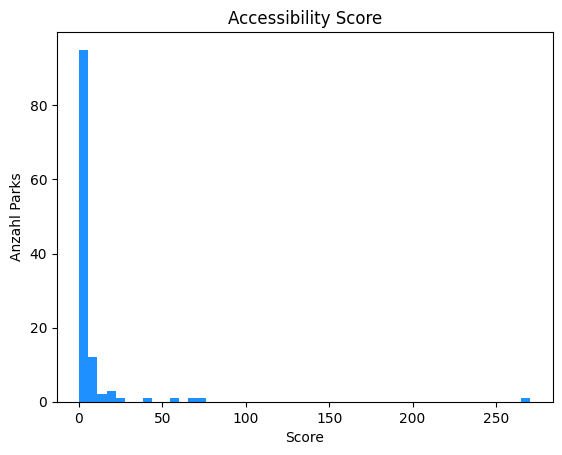

In [128]:
# histogram of accessibility score 
f, ax = plt.subplots(1,1)
plt.hist(entrance_score['acc_score_blocks'],bins=50, color = 'dodgerblue')

ax.set_title('Accessibility Score')
ax.set_xlabel('Score')
ax.set_ylabel('Anzahl Parks')

plt.show()

In [129]:
entrance_score.dtypes

name                 object
Einwohner           float64
Alter_D             float64
unter18_A           float64
ab65_A              float64
Auslaender_A        float64
HHGroesse_D         float64
Leerstandsquote     float64
Wohnfl_Bew_D        float64
Wohnfl_Whg_D        float64
census_blocks         int64
size_ha             float64
walk_dist             int64
size_m2             float64
park_pop_ratio      float64
acc_score_blocks    float64
dtype: object

In [130]:
# normalization of outliers using clipping at 30
entrance_score["acc_score_blocks"] = np.clip(entrance_score["acc_score_blocks"],0.0,30.0)

In [131]:
entrance_score.tail()

,name,Einwohner,Alter_D,unter18_A,ab65_A,Auslaender_A,HHGroesse_D,Leerstandsquote,Wohnfl_Bew_D,Wohnfl_Whg_D,census_blocks,size_ha,walk_dist,size_m2,park_pop_ratio,acc_score_blocks
113,Wehbers Park,12878.371442,39.316366,12.699704,12.198784,12.219869,1.718287,1.069639,37.733739,62.337495,4,3.1201,500,31201.0,2.422744,0.605686
114,Wesselhoeftpark,1307.841926,46.813732,17.254688,29.685362,7.681149,2.159567,2.493287,50.820125,73.635379,5,4.6759,500,46759.0,35.752792,7.150558
115,Westerpark,6346.673801,43.914671,20.399621,24.496555,7.899101,2.299675,2.339698,49.203689,82.871328,10,15.5176,1000,155176.0,24.449973,2.444997
116,Wilhelmsburger Inselpark,16561.259892,40.068034,18.612115,18.199966,25.369864,2.265382,1.769146,27.423082,60.043686,13,45.3670,1000,453670.0,27.393447,2.107188
117,Wohlers Park,9123.802748,37.703682,15.109093,10.180416,17.540858,1.867629,1.669557,34.593968,60.484302,4,4.6891,500,46891.0,5.139414,1.284854


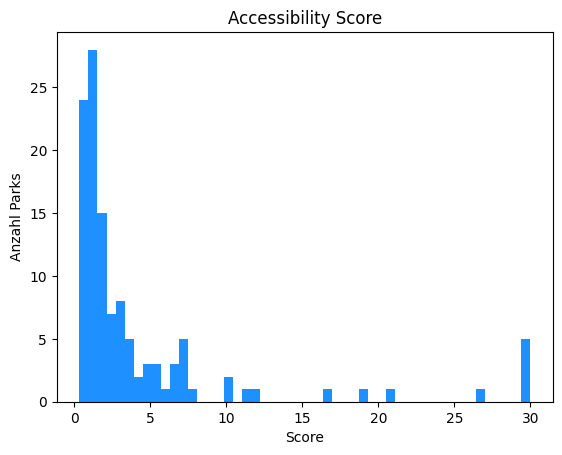

In [132]:
# histogram of accessibility score 
f, ax = plt.subplots(1,1)
plt.hist(entrance_score['acc_score_blocks'],bins=50, color = 'dodgerblue')

ax.set_title('Accessibility Score')
ax.set_xlabel('Score')
ax.set_ylabel('Anzahl Parks')

plt.show()

## Centroid Accessibility Score

In [133]:
#loading dataframes
centroid_sozio = pd.read_json('../get_isodistances/final_centroid.json', orient='index')
centroid_size = pd.read_json('../get_park_data/park_size_data.json', orient='index')
centroid_size

,name,size,walk_dist
0,Alsenpark,1.6005,500
1,Alsterpark Klein Borstel,27.2419,1000
2,Alstervorland,13.7983,1000
3,Alter Botanischer Garten,7.9442,500
4,Alter Elbpark,5.0377,500
...,...,...,...
117,Wehbers Park,3.1201,500
118,Wesselhoeftpark,4.6759,500
119,Westerpark,15.5176,1000
120,Wilhelmsburger Inselpark,45.3670,1000


In [134]:
# merging and transforming relevant columns
centroid_df = pd.merge(centroid_sozio, centroid_size, on="name")
centroid_df = centroid_df.rename(columns = {"size": "size_ha"})
centroid_df["size_m2"] = centroid_df["size_ha"]*10000
centroid_df

,name,Einwohner,Alter_D,unter18_A,ab65_A,Auslaender_A,HHGroesse_D,Leerstandsquote,Wohnfl_Bew_D,Wohnfl_Whg_D,census_blocks,size_ha,walk_dist,size_m2
0,Alsenpark,5839.597241,38.830349,14.558962,12.451697,18.851374,1.854181,0.925550,33.992604,61.139524,2,1.6005,500,16005.0
1,Alsterpark Klein Borstel,3463.191347,42.487286,19.352786,20.636621,6.239825,2.136114,1.920950,44.531753,91.854103,8,27.2419,1000,272419.0
2,Alstervorland,6123.512055,44.593324,13.136398,22.094391,10.109328,1.734782,3.372632,41.979193,0.000000,5,13.7983,1000,137983.0
3,Alter Botanischer Garten,542.986926,40.359939,9.525865,14.007745,21.981760,1.620717,2.291599,34.349430,60.016477,2,7.9442,500,79442.0
4,Alter Elbpark,3674.001932,40.127176,11.260889,12.798399,18.316414,1.673073,1.334792,36.720561,58.999285,4,5.0377,500,50377.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Wehbers Park,5693.124994,39.243227,12.798316,12.188507,12.817381,1.725108,1.041139,37.375890,61.960901,4,3.1201,500,31201.0
114,Wesselhoeftpark,494.563784,47.657387,16.520964,31.515127,7.514338,2.110112,2.615005,53.002648,0.000000,2,4.6759,500,46759.0
115,Westerpark,2689.645793,44.315940,20.477195,25.931119,8.056507,2.295649,2.303148,50.665168,0.000000,7,15.5176,1000,155176.0
116,Wilhelmsburger Inselpark,3790.451518,40.682645,18.342676,18.795096,23.906755,2.257325,0.918430,31.852991,69.674247,4,45.3670,1000,453670.0


In [135]:
# calculate accessibility score
centroid_score = calc_accessibility_score(centroid_df)
centroid_score.head()

,name,Einwohner,Alter_D,unter18_A,ab65_A,Auslaender_A,HHGroesse_D,Leerstandsquote,Wohnfl_Bew_D,Wohnfl_Whg_D,census_blocks,size_ha,walk_dist,size_m2,park_pop_ratio,acc_score_blocks
0,Alsenpark,5839.597241,38.830349,14.558962,12.451697,18.851374,1.854181,0.925550,33.992604,61.139524,2,1.6005,500,16005.0,2.740771,1.370386
1,Alsterpark Klein Borstel,3463.191347,42.487286,19.352786,20.636621,6.239825,2.136114,1.920950,44.531753,91.854103,8,27.2419,1000,272419.0,78.661261,9.832658
2,Alstervorland,6123.512055,44.593324,13.136398,22.094391,10.109328,1.734782,3.372632,41.979193,0.000000,5,13.7983,1000,137983.0,22.533311,4.506662
3,Alter Botanischer Garten,542.986926,40.359939,9.525865,14.007745,21.981760,1.620717,2.291599,34.349430,60.016477,2,7.9442,500,79442.0,146.305548,73.152774
4,Alter Elbpark,3674.001932,40.127176,11.260889,12.798399,18.316414,1.673073,1.334792,36.720561,58.999285,4,5.0377,500,50377.0,13.711751,3.427938


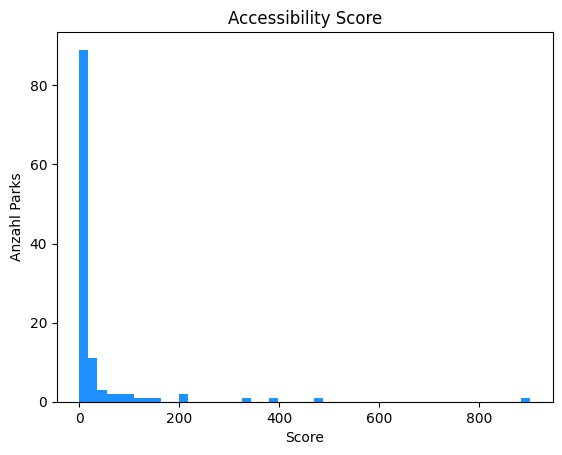

In [136]:
# histogram of accessibility score 
f, ax = plt.subplots(1,1)
plt.hist(centroid_score['acc_score_blocks'],bins=50, color = 'dodgerblue')

ax.set_title('Accessibility Score')
ax.set_xlabel('Score')
ax.set_ylabel('Anzahl Parks')

plt.show()

In [140]:
# normalization of outliers using clipping at 50
centroid_score["acc_score_blocks"] = np.clip(centroid_score["acc_score_blocks"],0.0,50.0)

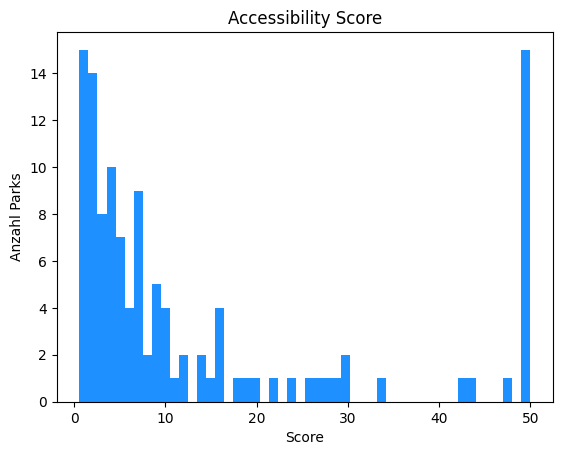

In [141]:
# histogram of accessibility score 
f, ax = plt.subplots(1,1)
plt.hist(centroid_score['acc_score_blocks'],bins=50, color = 'dodgerblue')

ax.set_title('Accessibility Score')
ax.set_xlabel('Score')
ax.set_ylabel('Anzahl Parks')

plt.show()

In [139]:
# save dataframes
centroid_score.to_json('centroid_score.json', indent=2, orient ='index')
entrance_score.to_json('entrance_score.json', indent=2, orient ='index')

## Accessibility Score 500m all

### Entrance Approach

In [2]:
#loading dataframes
entrance_500_sozio = pd.read_json('../get_isodistances/final_entrance_500.json', orient='index')
entrance_size = pd.read_json('../get_park_data/park_size_data.json', orient='index')

In [15]:
# merging and transforming relevant columns
entrance_500_df = pd.merge(entrance_500_sozio, entrance_size, on="name")
entrance_500_df = entrance_500_df.rename(columns = {"size": "size_ha"})
entrance_500_df["size_m2"] = entrance_500_df["size_ha"]*10000
entrance_500_df = entrance_500_df.drop(columns= ["walk_dist"])
entrance_500_df

,name,Einwohner,Alter_D,unter18_A,ab65_A,Auslaender_A,HHGroesse_D,Leerstandsquote,Wohnfl_Bew_D,Wohnfl_Whg_D,census_blocks,size_ha,size_m2
0,Alsenpark,9072.626025,38.776610,14.490263,12.280133,18.304357,1.845922,0.987105,34.301941,61.099637,5,1.6005,16005.0
1,Alsterpark Klein Borstel,6026.504194,42.474464,18.462703,20.262736,6.808977,2.074803,2.040805,43.643454,90.931212,8,27.2419,272419.0
2,Alstervorland,6247.377232,44.973024,12.580835,22.358921,10.373064,1.728422,3.402602,42.458974,67.956450,8,13.7983,137983.0
3,Alter Botanischer Garten,1878.313169,39.834621,10.462073,13.310635,22.300698,1.661957,2.560280,37.518677,61.964281,6,7.9442,79442.0
4,Alter Elbpark,9109.480809,39.762051,11.088312,12.206716,19.903076,1.677313,1.851163,36.447384,58.348299,4,5.0377,50377.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Wehbers Park,12878.371442,39.316366,12.699704,12.198784,12.219869,1.718287,1.069639,37.733739,62.337495,4,3.1201,31201.0
114,Wesselhoeftpark,1307.841926,46.813732,17.254688,29.685362,7.681149,2.159567,2.493287,50.820125,73.635379,5,4.6759,46759.0
115,Westerpark,2345.235726,44.260129,20.641829,25.964137,8.017461,2.297658,2.307766,53.037676,0.000000,6,15.5176,155176.0
116,Wilhelmsburger Inselpark,7257.563755,40.652625,18.140805,18.972597,24.384096,2.241496,1.578864,30.572419,65.920633,8,45.3670,453670.0


In [16]:
entrance_500_score = calc_accessibility_score(entrance_500_df)
entrance_500_score.head()

,name,Einwohner,Alter_D,unter18_A,ab65_A,Auslaender_A,HHGroesse_D,Leerstandsquote,Wohnfl_Bew_D,Wohnfl_Whg_D,census_blocks,size_ha,size_m2,park_pop_ratio,acc_score_blocks
0,Alsenpark,9072.626025,38.776610,14.490263,12.280133,18.304357,1.845922,0.987105,34.301941,61.099637,5,1.6005,16005.0,1.764098,0.352820
1,Alsterpark Klein Borstel,6026.504194,42.474464,18.462703,20.262736,6.808977,2.074803,2.040805,43.643454,90.931212,8,27.2419,272419.0,45.203486,5.650436
2,Alstervorland,6247.377232,44.973024,12.580835,22.358921,10.373064,1.728422,3.402602,42.458974,67.956450,8,13.7983,137983.0,22.086548,2.760819
3,Alter Botanischer Garten,1878.313169,39.834621,10.462073,13.310635,22.300698,1.661957,2.560280,37.518677,61.964281,6,7.9442,79442.0,42.294332,7.049055
4,Alter Elbpark,9109.480809,39.762051,11.088312,12.206716,19.903076,1.677313,1.851163,36.447384,58.348299,4,5.0377,50377.0,5.530172,1.382543


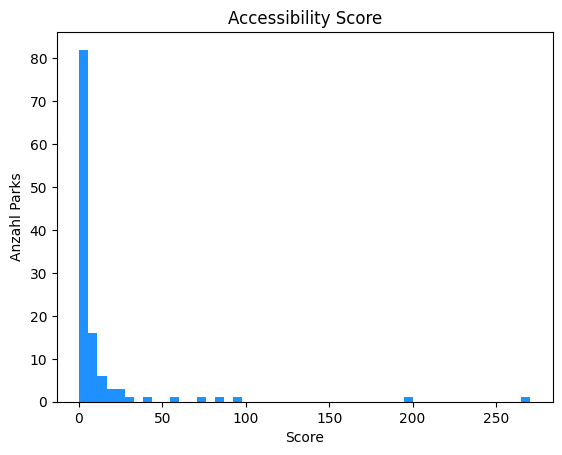

In [17]:
# histogram of accessibility score 
f, ax = plt.subplots(1,1)
plt.hist(entrance_500_score['acc_score_blocks'],bins=50, color = 'dodgerblue')

ax.set_title('Accessibility Score')
ax.set_xlabel('Score')
ax.set_ylabel('Anzahl Parks')

plt.show()

In [18]:
# normalization of outliers using clipping at 30
entrance_500_score["acc_score_blocks"] = np.clip(entrance_500_score["acc_score_blocks"],0.0,30.0)

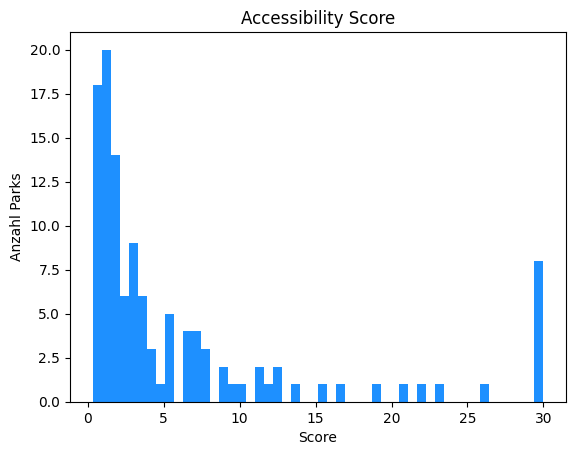

In [19]:
# histogram of accessibility score 
f, ax = plt.subplots(1,1)
plt.hist(entrance_500_score['acc_score_blocks'],bins=50, color = 'dodgerblue')

ax.set_title('Accessibility Score')
ax.set_xlabel('Score')
ax.set_ylabel('Anzahl Parks')

plt.show()

### Centroid Approach

In [13]:
#loading dataframes
centroid_500_sozio = pd.read_json('../get_isodistances/final_centroid_500.json', orient='index')
centroid_size = pd.read_json('../get_park_data/park_size_data.json', orient='index')
centroid_500_sozio

,name,Einwohner,Alter_D,unter18_A,ab65_A,Auslaender_A,HHGroesse_D,Leerstandsquote,Wohnfl_Bew_D,Wohnfl_Whg_D,census_blocks
0,Alsenpark,5839.597241,38.830349,14.558962,12.451697,18.851374,1.854181,0.925550,33.992604,61.139524,2
1,Alsterpark Klein Borstel,498.846801,42.200000,20.810000,20.170000,5.900000,2.200000,2.100000,46.000000,94.000000,1
2,Alstervorland,1582.840824,44.969283,12.187035,22.275385,9.653895,1.692791,3.481648,0.000000,0.000000,4
3,Alter Botanischer Garten,542.768832,40.358078,9.528761,14.005235,21.983218,1.620849,2.292509,34.349441,60.016495,2
4,Alter Elbpark,3806.536299,40.099118,11.273099,12.759694,18.323637,1.674150,1.340416,36.708989,59.001729,4
...,...,...,...,...,...,...,...,...,...,...,...
113,Wehbers Park,5693.124994,39.243227,12.798316,12.188507,12.817381,1.725108,1.041139,37.375890,61.960901,4
114,Wesselhoeftpark,494.563784,47.657387,16.520964,31.515127,7.514338,2.110112,2.615005,53.002648,0.000000,2
115,Westerpark,689.184390,44.576101,20.406619,26.793960,7.832535,2.287467,2.345847,53.014815,0.000000,3
116,Wilhelmsburger Inselpark,973.646221,40.510527,18.691416,18.451293,24.178166,2.260967,0.969292,31.695625,69.303173,4


In [20]:
# merging and transforming relevant columns
centroid_500_df = pd.merge(centroid_500_sozio, entrance_size, on="name")
centroid_500_df = centroid_500_df.rename(columns = {"size": "size_ha"})
centroid_500_df["size_m2"] = centroid_500_df["size_ha"]*10000
centroid_500_df = centroid_500_df.drop(columns=["walk_dist"])
centroid_500_df

,name,Einwohner,Alter_D,unter18_A,ab65_A,Auslaender_A,HHGroesse_D,Leerstandsquote,Wohnfl_Bew_D,Wohnfl_Whg_D,census_blocks,size_ha,size_m2
0,Alsenpark,5839.597241,38.830349,14.558962,12.451697,18.851374,1.854181,0.925550,33.992604,61.139524,2,1.6005,16005.0
1,Alsterpark Klein Borstel,498.846801,42.200000,20.810000,20.170000,5.900000,2.200000,2.100000,46.000000,94.000000,1,27.2419,272419.0
2,Alstervorland,1582.840824,44.969283,12.187035,22.275385,9.653895,1.692791,3.481648,0.000000,0.000000,4,13.7983,137983.0
3,Alter Botanischer Garten,542.768832,40.358078,9.528761,14.005235,21.983218,1.620849,2.292509,34.349441,60.016495,2,7.9442,79442.0
4,Alter Elbpark,3806.536299,40.099118,11.273099,12.759694,18.323637,1.674150,1.340416,36.708989,59.001729,4,5.0377,50377.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,Wehbers Park,5693.124994,39.243227,12.798316,12.188507,12.817381,1.725108,1.041139,37.375890,61.960901,4,3.1201,31201.0
114,Wesselhoeftpark,494.563784,47.657387,16.520964,31.515127,7.514338,2.110112,2.615005,53.002648,0.000000,2,4.6759,46759.0
115,Westerpark,689.184390,44.576101,20.406619,26.793960,7.832535,2.287467,2.345847,53.014815,0.000000,3,15.5176,155176.0
116,Wilhelmsburger Inselpark,973.646221,40.510527,18.691416,18.451293,24.178166,2.260967,0.969292,31.695625,69.303173,4,45.3670,453670.0


In [25]:
centroid_500_score = calc_accessibility_score(centroid_500_df)
centroid_500_score.head()

,name,Einwohner,Alter_D,unter18_A,ab65_A,Auslaender_A,HHGroesse_D,Leerstandsquote,Wohnfl_Bew_D,Wohnfl_Whg_D,census_blocks,size_ha,size_m2,park_pop_ratio,acc_score_blocks
0,Alsenpark,5839.597241,38.830349,14.558962,12.451697,18.851374,1.854181,0.925550,33.992604,61.139524,2,1.6005,16005.0,2.740771,1.370386
1,Alsterpark Klein Borstel,498.846801,42.200000,20.810000,20.170000,5.900000,2.200000,2.100000,46.000000,94.000000,1,27.2419,272419.0,546.097518,546.097518
2,Alstervorland,1582.840824,44.969283,12.187035,22.275385,9.653895,1.692791,3.481648,0.000000,0.000000,4,13.7983,137983.0,87.174274,21.793569
3,Alter Botanischer Garten,542.768832,40.358078,9.528761,14.005235,21.983218,1.620849,2.292509,34.349441,60.016495,2,7.9442,79442.0,146.364337,73.182168
4,Alter Elbpark,3806.536299,40.099118,11.273099,12.759694,18.323637,1.674150,1.340416,36.708989,59.001729,4,5.0377,50377.0,13.234341,3.308585


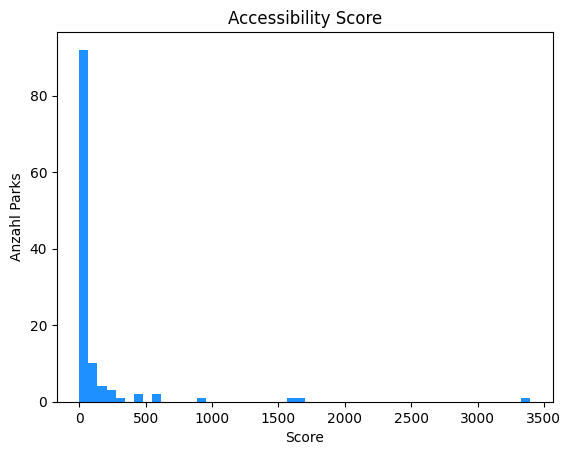

In [26]:
# histogram of accessibility score 
f, ax = plt.subplots(1,1)
plt.hist(centroid_500_score['acc_score_blocks'],bins=50, color = 'dodgerblue')

ax.set_title('Accessibility Score')
ax.set_xlabel('Score')
ax.set_ylabel('Anzahl Parks')

plt.show()

In [27]:
# normalization of outliers using clipping at 50
centroid_500_score["acc_score_blocks"] = np.clip(centroid_500_score["acc_score_blocks"],0.0,100.0)

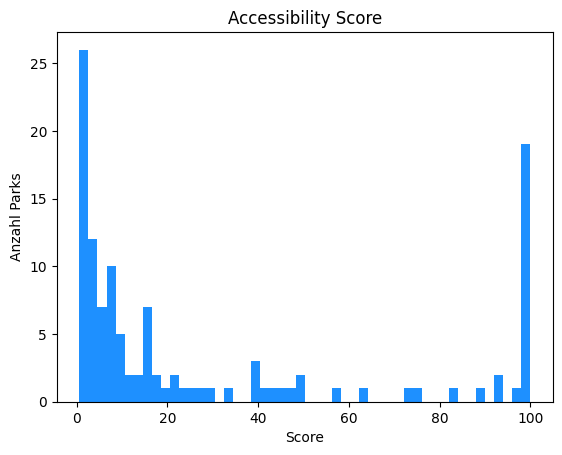

In [28]:
# histogram of accessibility score 
f, ax = plt.subplots(1,1)
plt.hist(centroid_500_score['acc_score_blocks'],bins=50, color = 'dodgerblue')

ax.set_title('Accessibility Score')
ax.set_xlabel('Score')
ax.set_ylabel('Anzahl Parks')

plt.show()

In [29]:
centroid_500_score.head()

,name,Einwohner,Alter_D,unter18_A,ab65_A,Auslaender_A,HHGroesse_D,Leerstandsquote,Wohnfl_Bew_D,Wohnfl_Whg_D,census_blocks,size_ha,size_m2,park_pop_ratio,acc_score_blocks
0,Alsenpark,5839.597241,38.830349,14.558962,12.451697,18.851374,1.854181,0.925550,33.992604,61.139524,2,1.6005,16005.0,2.740771,1.370386
1,Alsterpark Klein Borstel,498.846801,42.200000,20.810000,20.170000,5.900000,2.200000,2.100000,46.000000,94.000000,1,27.2419,272419.0,546.097518,100.000000
2,Alstervorland,1582.840824,44.969283,12.187035,22.275385,9.653895,1.692791,3.481648,0.000000,0.000000,4,13.7983,137983.0,87.174274,21.793569
3,Alter Botanischer Garten,542.768832,40.358078,9.528761,14.005235,21.983218,1.620849,2.292509,34.349441,60.016495,2,7.9442,79442.0,146.364337,73.182168
4,Alter Elbpark,3806.536299,40.099118,11.273099,12.759694,18.323637,1.674150,1.340416,36.708989,59.001729,4,5.0377,50377.0,13.234341,3.308585


In [ ]:
# save dataframes
centroid_500_score.to_json('centroid_500_score.json', indent=2, orient ='index')
entrance_500_score.to_json('entrance_500_score.json', indent=2, orient ='index')